### Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels as sm
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from IPython.display import Image

### Dataset

https://www.kaggle.com/roshansharma/online-shoppers-intention#online_shoppers_intention.csv

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
df.shape

(12330, 18)

The dataset consists of features belonging to 12,330 sessions. 

Une session désigne une visite individuelle, initiée par un utilisateur. Une session est définie comme l’ensemble des interactions d’un utilisateur dans un laps de temps donné sur votre site web. Dans Google Analytics, les sessions sont donc la somme de l’ensemble des sessions individuelles initiées par des visiteurs. Une session prend fin après 30 minutes d’inactivité de la part du visiteur sur votre site, si la journée touche à sa fin, ou encore s’il quitte le site et ne revient pas dans les 30 minutes suivantes. Si le visiteur quitte le site et revient dans les 30 minutes qui suivent, alors Google ne comptabilise qu’une seule session.

The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.



In [5]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


https://online-metrics.com/page-value/  
https://cxl.com/guides/bounce-rate/bounce-rate-vs-exit-rate/

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1,0.6,0.38,0.26,0.43,0.37,-0.22,-0.32,0.099,-0.095,-0.0065,-0.025,-0.0057,-0.034,0.026,0.14
Administrative_Duration,0.6,1,0.3,0.24,0.29,0.36,-0.14,-0.21,0.067,-0.073,-0.0074,-0.016,-0.0057,-0.014,0.015,0.093
Informational,0.38,0.3,1,0.62,0.37,0.39,-0.12,-0.16,0.049,-0.048,-0.0094,-0.038,-0.029,-0.035,0.036,0.095
Informational_Duration,0.26,0.24,0.62,1,0.28,0.35,-0.074,-0.11,0.031,-0.031,-0.0096,-0.019,-0.027,-0.025,0.024,0.07
ProductRelated,0.43,0.29,0.37,0.28,1,0.86,-0.2,-0.29,0.056,-0.024,0.0042,-0.013,-0.038,-0.043,0.016,0.16
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1,-0.18,-0.25,0.053,-0.037,0.0029,-0.0075,-0.033,-0.037,0.0073,0.15
BounceRates,-0.22,-0.14,-0.12,-0.074,-0.2,-0.18,1,0.91,-0.12,0.073,0.024,-0.016,-0.0067,0.079,-0.047,-0.15
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1,-0.17,0.1,0.015,-0.0044,-0.0088,0.079,-0.063,-0.21
PageValues,0.099,0.067,0.049,0.031,0.056,0.053,-0.12,-0.17,1,-0.064,0.019,0.046,0.011,0.013,0.012,0.49
SpecialDay,-0.095,-0.073,-0.048,-0.031,-0.024,-0.037,0.073,0.1,-0.064,1,0.013,0.0035,-0.016,0.052,-0.017,-0.082


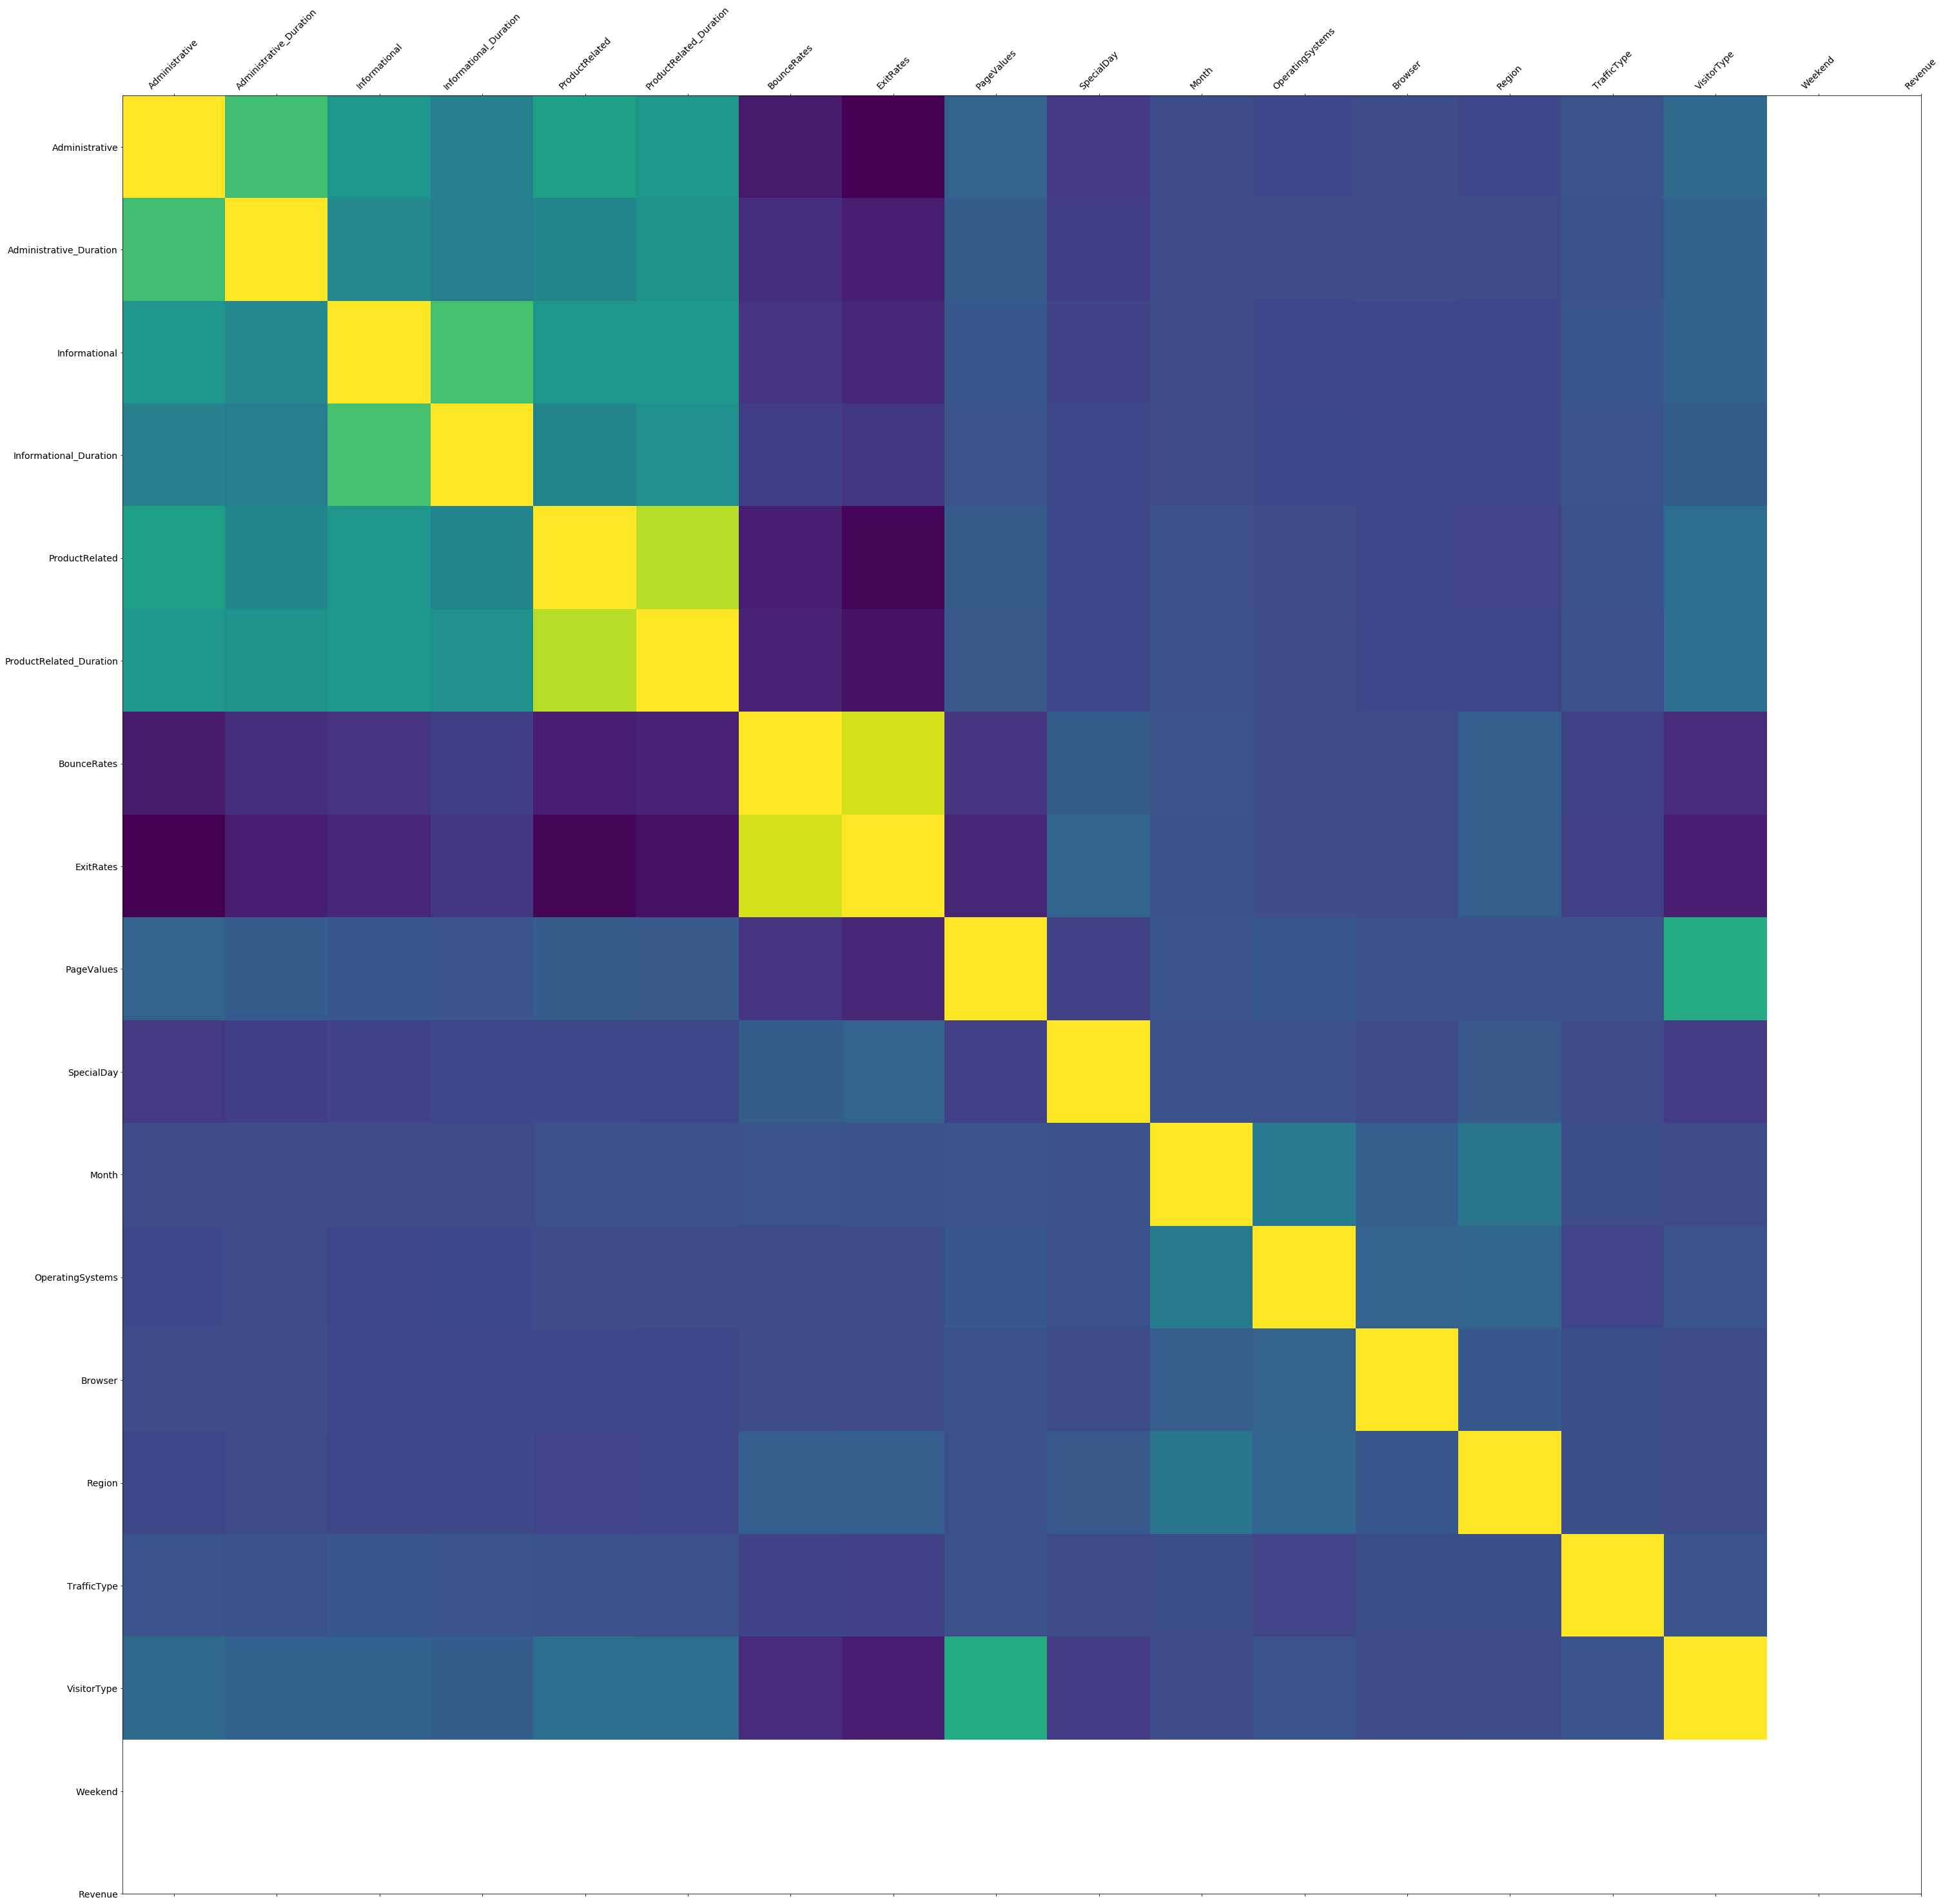

In [10]:
f = plt.figure(figsize=(50,50))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Formation\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Formation\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


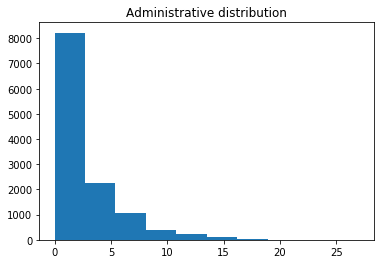

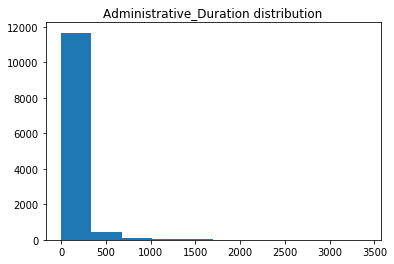

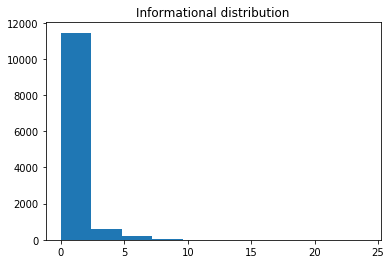

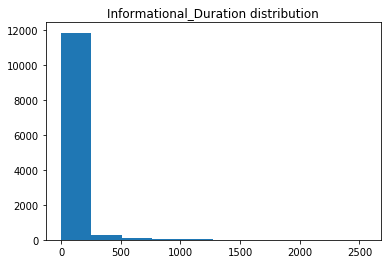

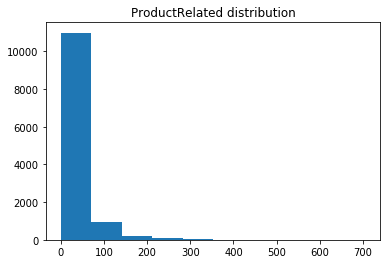

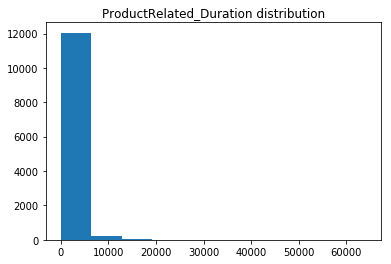

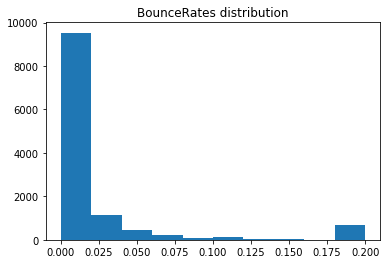

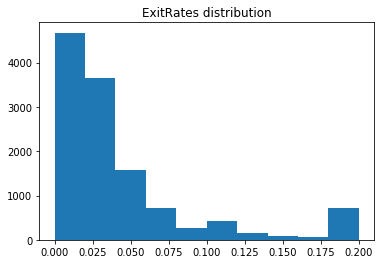

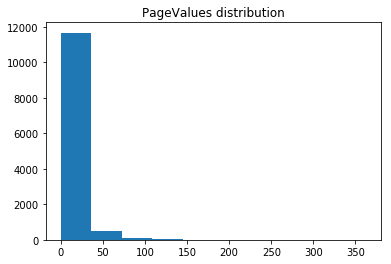

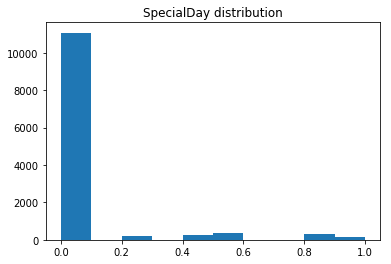

In [11]:
for col in df.select_dtypes('float64').columns:
    plt.hist(x = col, data = df)
    plt.title(f'{col} distribution')
    plt.show()

### DF Revenue

In [12]:
df_revenue = df[df['Revenue']==True]

In [13]:
df_revenue.shape

(1908, 18)

In [14]:
df_revenue.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3.0,87.833333,0.0,0.000000,27.0,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10.0,1005.666667,0.0,0.000000,36.0,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
101,4.0,61.000000,0.0,0.000000,19.0,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
188,9.0,111.500000,1.0,48.500000,49.0,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
196,2.0,56.000000,1.0,144.000000,67.0,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True
198,0.0,0.000000,0.0,0.000000,17.0,840.233333,0.000000,0.001667,109.176000,0.0,Mar,2,2,9,2,New_Visitor,False,True
199,3.0,94.000000,2.0,125.000000,55.0,1970.844805,0.000000,0.001724,96.255116,0.0,Mar,2,4,1,2,New_Visitor,True,True
200,1.0,32.000000,0.0,0.000000,50.0,2867.000000,0.000000,0.004000,153.443248,0.0,Mar,2,2,7,8,Returning_Visitor,True,True
206,1.0,18.000000,0.0,0.000000,16.0,1331.750000,0.000000,0.012500,33.799567,0.0,Mar,2,5,2,3,New_Visitor,False,True
220,2.0,38.000000,0.0,0.000000,14.0,643.000000,0.000000,0.013333,35.092800,0.0,Mar,2,2,5,1,Returning_Visitor,False,True


In [15]:
df_revenue.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.929779,1.897042,2.407173,3.987140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


C:\Users\Formation\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1,0.61,0.38,0.28,0.4,0.38,-0.04,-0.12,-0.16,-0.076,0.027,-0.046,-0.044,-0.0015,-0.0088,nan
Administrative_Duration,0.61,1,0.29,0.22,0.24,0.29,-0.035,-0.085,-0.087,-0.06,-0.00083,-0.017,-0.032,0.021,-0.039,nan
Informational,0.38,0.29,1,0.63,0.34,0.35,0.019,-0.035,-0.14,-0.024,-0.019,-0.059,-0.069,-0.024,-0.015,nan
Informational_Duration,0.28,0.22,0.63,1,0.26,0.3,0.0038,-0.041,-0.1,0.012,-0.0012,-0.029,-0.044,-0.042,0.002,nan
ProductRelated,0.4,0.24,0.34,0.26,1,0.91,-0.032,-0.15,-0.18,-0.054,0.0064,-0.046,-0.096,-0.064,-0.034,nan
ProductRelated_Duration,0.38,0.29,0.35,0.3,0.91,1,-0.023,-0.12,-0.18,-0.05,0.0038,-0.04,-0.079,-0.061,-0.04,nan
BounceRates,-0.04,-0.035,0.019,0.0038,-0.032,-0.023,1,0.74,-0.15,0.025,0.029,0.0028,-0.03,0.076,-0.044,nan
ExitRates,-0.12,-0.085,-0.035,-0.041,-0.15,-0.12,0.74,1,-0.23,0.022,-0.026,0.0037,-0.028,0.056,-0.039,nan
PageValues,-0.16,-0.087,-0.14,-0.1,-0.18,-0.18,-0.15,-0.23,1,-0.026,0.079,0.11,0.061,0.08,0.0012,nan
SpecialDay,-0.076,-0.06,-0.024,0.012,-0.054,-0.05,0.025,0.022,-0.026,1,0.0068,-0.0014,0.019,-0.0038,-0.015,nan


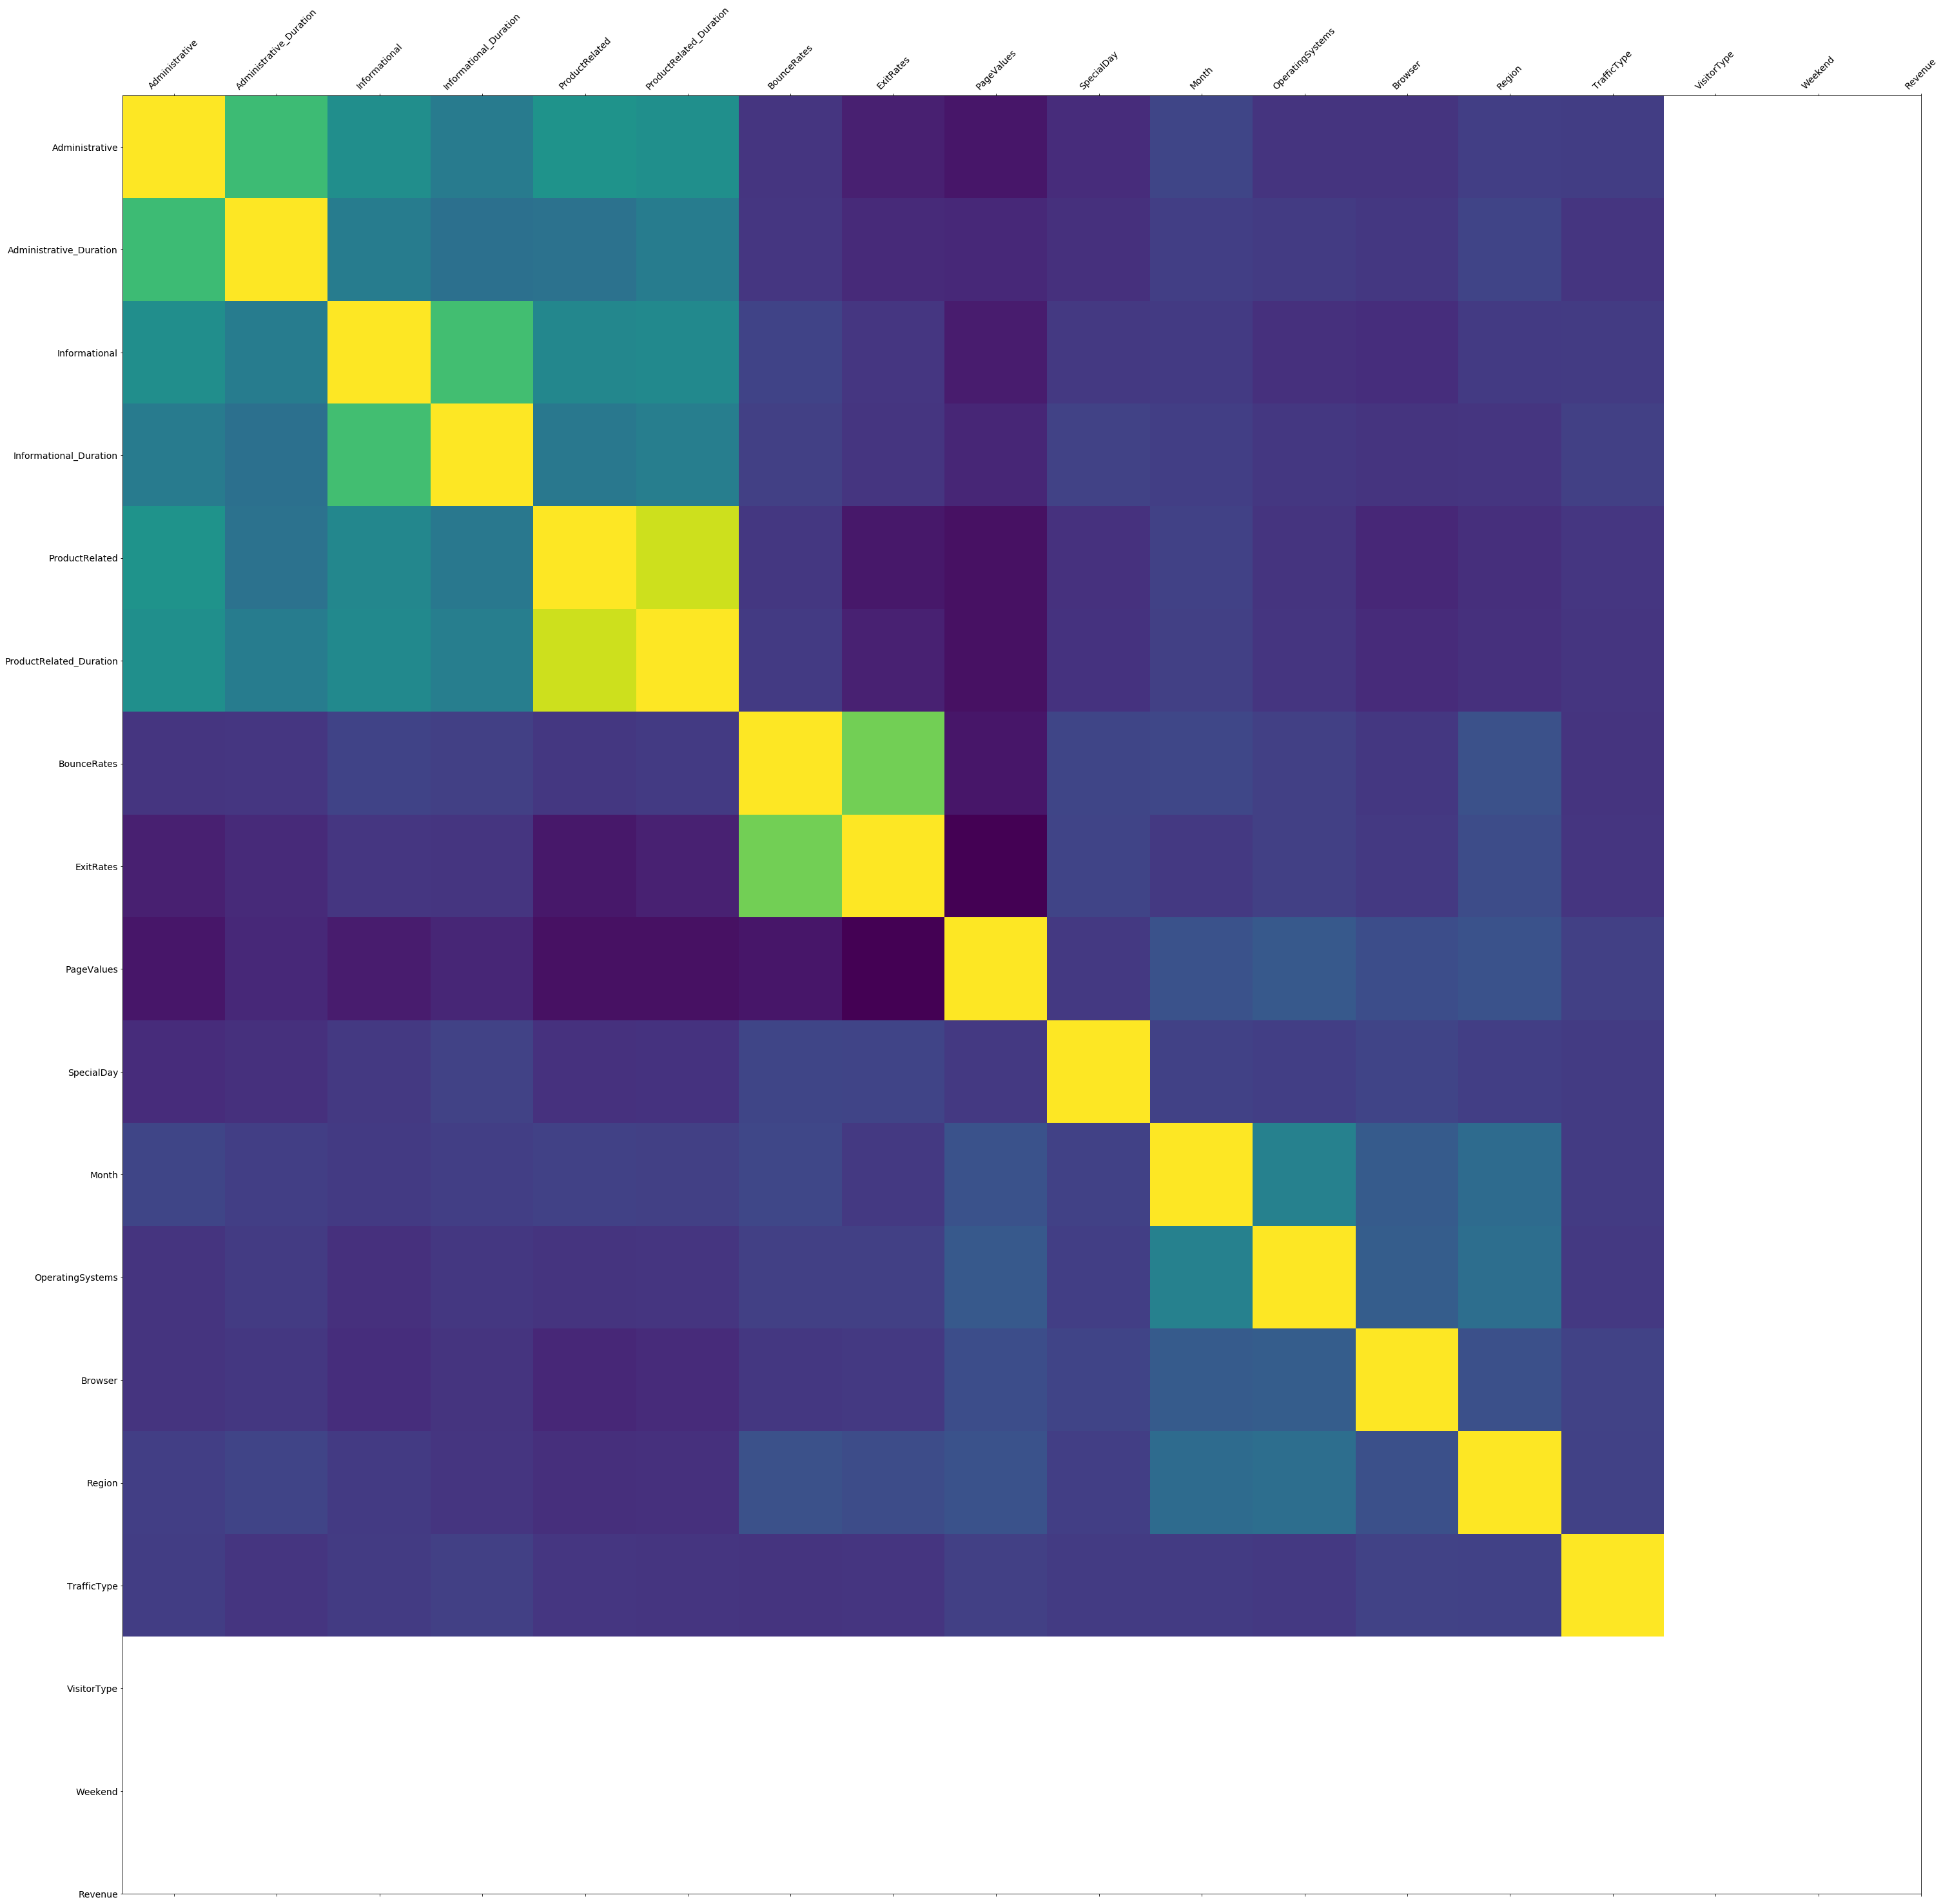

In [23]:
f = plt.figure(figsize=(50,50))
plt.matshow(df_revenue.corr(), fignum=f.number)
plt.xticks(range(df_revenue.shape[1]), df_revenue.columns, fontsize=14, rotation=45)
plt.yticks(range(df_revenue.shape[1]), df_revenue.columns, fontsize=14)
corr = df_revenue.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

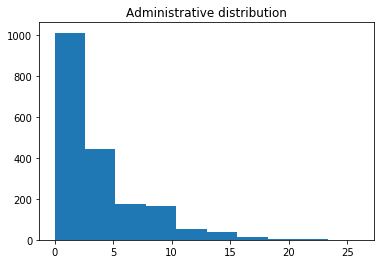

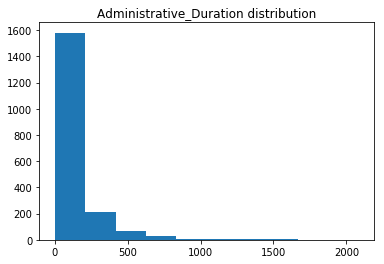

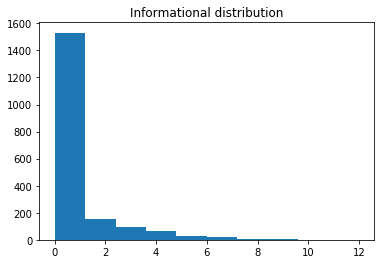

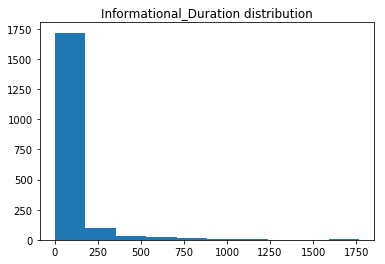

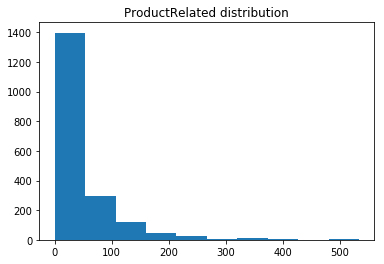

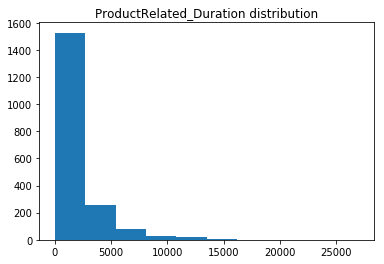

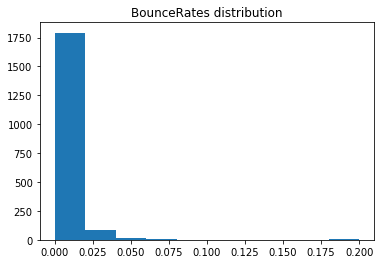

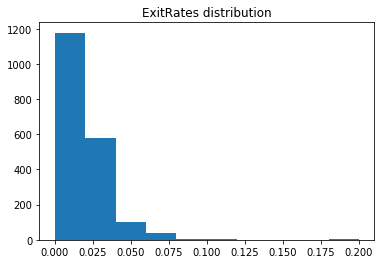

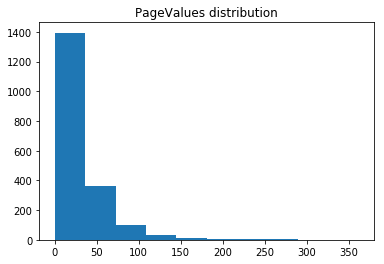

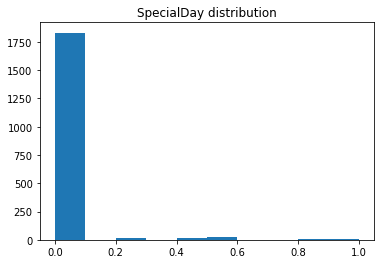

In [24]:
for col in df_revenue.select_dtypes('float64').columns:
    plt.hist(x = col, data = df_revenue)
    plt.title(f'{col} distribution')
    plt.show()

### Plot variables KPI WEB

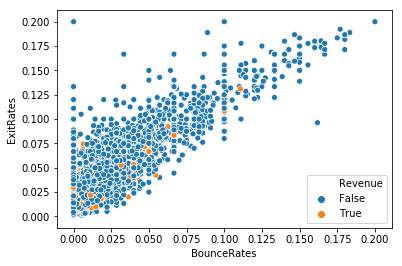

In [26]:
sns.scatterplot(x="BounceRates", y="ExitRates", hue="Revenue", data=df)

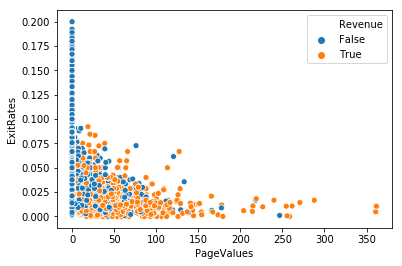

In [27]:
sns.scatterplot(x="PageValues", y="ExitRates", hue="Revenue", data=df)

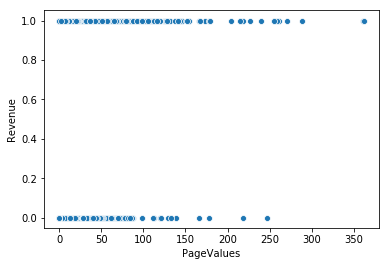

In [28]:
sns.scatterplot(x="PageValues", y="Revenue", data=df)

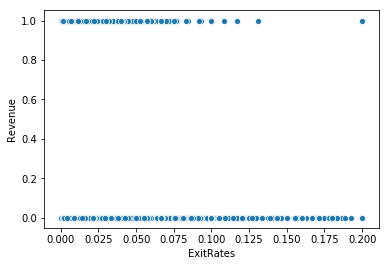

In [21]:
sns.scatterplot(x="ExitRates", y="Revenue", data=df)

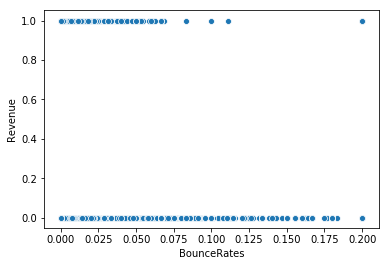

In [22]:
sns.scatterplot(x="BounceRates", y="Revenue", data=df)